In [53]:
import pandas as pd
from sklearn import datasets
data = datasets.load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [54]:
import sklearn
import pandas
X,y = sklearn.datasets.load_boston(return_X_y=True)
Xp = pd.DataFrame(X,columns=data.feature_names)
Xp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [55]:
# evaluate decision tree on synthetic regression dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
# define dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define the model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -2.890 (0.509)


In [56]:
# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeRegressor())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeRegressor())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return models + [('ensemble', ensemble)]

>norm: -2.893 (0.556)
>std: -2.863 (0.502)
>robust: -2.926 (0.515)
>power: -2.942 (0.540)
>quant: -2.915 (0.513)
>kbins: -3.058 (0.473)
>ensemble: -2.647 (0.416)


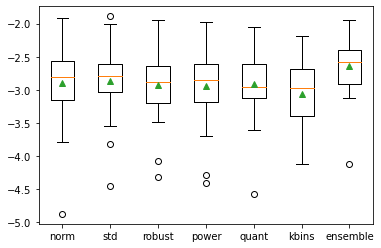

In [57]:
# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeRegressor())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeRegressor())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return models + [('ensemble', ensemble)]

# generate regression dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# get models
models = get_ensemble()
# evaluate each model
results = list()
for name,model in models:
	# define the evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model on the dataset
	n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# report performance
	print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))
	results.append(n_scores)
# plot the results for comparison
pyplot.boxplot(results, labels=[n for n,_ in models], showmeans=True)
pyplot.show()

In [58]:
# cost function for base models
def rmse(yreal, yhat):
	return sqrt(mean_squared_error(yreal, yhat))

In [59]:
# create the super learner
def get_super_learner(X):
	ensemble = SuperLearner(scorer=rmse, folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(LinearRegression())
	return ensemble

In [60]:
...
# fit the super learner
ensemble.fit(X, y)

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=True,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_ex...7633EE0>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=126,
       scorer=<function rmse at 0x0000028797633EE0>, shuffle=True,
       verbose=False)

In [61]:
...
# summarize base learners
print(ensemble.data)

                                  score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostregressor           3.55     0.62  1.55  0.22  0.03  0.01
layer-1  baggingregressor            3.35     0.59  0.43  0.05  0.01  0.01
layer-1  decisiontreeregressor       3.87     0.74  0.03  0.01  0.00  0.00
layer-1  elasticnet                  5.26     0.55  0.02  0.02  0.00  0.00
layer-1  extratreesregressor         3.09     0.79  0.29  0.05  0.01  0.01
layer-1  kneighborsregressor         6.17     0.68  0.01  0.01  0.01  0.00
layer-1  linearregression            4.83     0.62  0.02  0.01  0.00  0.00
layer-1  randomforestregressor       3.22     0.55  0.16  0.04  0.01  0.00
layer-1  svr                         8.13     1.19  0.02  0.00  0.00  0.00



In [46]:
! pip install mlens

In [62]:
# example of a super learner for regression using the mlens library
from math import sqrt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from mlens.ensemble import SuperLearner

# create a list of base-models
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(ElasticNet())
	models.append(SVR(gamma='scale'))
	models.append(DecisionTreeRegressor())
	models.append(KNeighborsRegressor())
	models.append(AdaBoostRegressor())
	models.append(BaggingRegressor(n_estimators=10))
	models.append(RandomForestRegressor(n_estimators=10))
	models.append(ExtraTreesRegressor(n_estimators=10))
	return models

# cost function for base models
def rmse(yreal, yhat):
	return sqrt(mean_squared_error(yreal, yhat))

# create the super learner
def get_super_learner(X):
	ensemble = SuperLearner(scorer=rmse, folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(LinearRegression())
	return ensemble

# create the inputs and outputs
#X, y = make_regression(n_samples=1000, n_features=100, noise=0.5)
# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.20)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
# create the super learner
ensemble = get_super_learner(X)
# fit the super learner
ensemble.fit(X, y)
# summarize base learners
print(ensemble.data)
# evaluate meta model
yhat = ensemble.predict(X_val)
print('Super Learner: RMSE %.3f' % (rmse(y_val, yhat)))

Train (404, 13) (404,) Test (102, 13) (102,)
                                  score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostregressor           3.82     0.84  1.33  0.36  0.03  0.02
layer-1  baggingregressor            3.69     0.98  0.27  0.04  0.01  0.00
layer-1  decisiontreeregressor       4.86     1.34  0.03  0.01  0.00  0.00
layer-1  elasticnet                  5.14     0.80  0.02  0.02  0.00  0.00
layer-1  extratreesregressor         3.17     0.74  0.21  0.02  0.02  0.01
layer-1  kneighborsregressor         6.28     1.09  0.00  0.00  0.00  0.00
layer-1  linearregression            4.63     0.82  0.01  0.00  0.00  0.00
layer-1  randomforestregressor       3.62     1.02  0.16  0.03  0.01  0.00
layer-1  svr                         8.03     1.15  0.01  0.00  0.00  0.00

Super Learner: RMSE 3.590


In [63]:
from sklearn.metrics import r2_score
print("R2_SCORE : ",r2_score(y_val, yhat))

R2_SCORE :  0.8597537786923001


In [64]:
def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	# define split of data
	kfold = KFold(n_splits=10, shuffle=True)
	# enumerate splits
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict_proba(test_X)
			# store columns
			fold_yhats.append(yhat)
		# store fold yhats as columns
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)

In [65]:
from sklearn.metrics import r2_score
print("R2_SCORE : ",r2_score(y_val, yhat))

R2_SCORE :  0.8597537786923001


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,y)